# Chapter 2:  Interpolation and Approximation

*Approximation theory* studies how to find the best approximation to a given function by another function from some predetermined class, and how good this approximation is.  In this chapter we are going to explore this field through two settings: *interpolation* and *least-squares approximation*.

## Motivation

Consider an meteorological experiment that measures the temperature on a set of buoys located on a _rectangular grid_ at sea.  We can emulate such an experiment by indicating the longitude, latitude and random temperatures between, say 36ºF and 46ºF, on a grid of 16-by-16 locations, as follows:

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm; 
from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline

In [3]:
map1 = Basemap(projection='ortho', lat_0=20, lon_0=-60, resolution='l', area_thresh=1000.0)

In [4]:
map2 = Basemap(projection='merc', lat_0=20, lon_0=-60, resolution='l', 
               area_thresh=1000.0, llcrnrlat=0,  urcrnrlat=45, llcrnrlon=-75, urcrnrlon=-15)

In [5]:
longitudes = np.linspace(-60, -30, 16) 
latitudes = np.linspace(15, 30, 16) 
lons, lats = np.meshgrid(longitudes, latitudes) 
temperatures = 10. * np.random.randn(16, 16) + 36.
x1, y1 = map1(lons, lats)
x2, y2 = map2(lons, lats)

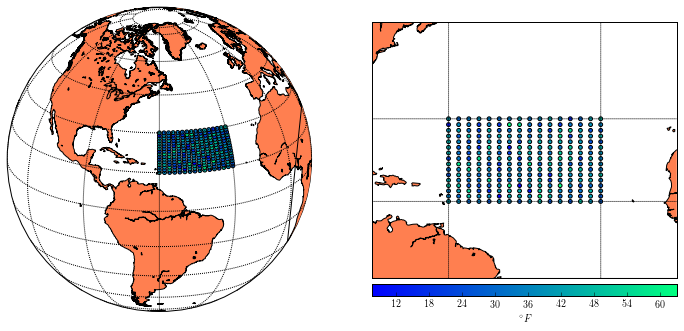

In [6]:
plt.rc('text', usetex=True)
plt.figure(figsize=(12,6))

plt.subplot(121, aspect='equal')
map1.drawmeridians(np.arange(0, 360, 30))
map1.drawparallels(np.arange(-90, 90, 15))
map1.drawcoastlines()
map1.fillcontinents(color='coral')
map1.scatter(x1, y1, 15, temperatures, cmap=cm.winter)

plt.subplot(122)
map2.drawmeridians(np.arange(0, 360, 30))
map2.drawparallels(np.arange(-90, 90, 15))
map2.drawcoastlines()
map2.fillcontinents(color='coral')
C = map2.scatter(x2, y2, 15, temperatures, cmap=cm.winter)
Cb = map2.colorbar(C, "bottom", size="5%", pad="2%")
Cb.set_label(r'$\mbox{}^{\circ} F$')

plt.show()

It is possible to _guess_ the temperature in between those buoys (not exactly, but at least to some extent) since the temperature is continuous on the surface of the Earth.  Let us assume we require an approximation by means of piecewise 2D polynomials of degree three, with maximum smoothness where the pieces intersect each other.  One obvious challenge is, of course, that the buoys are not located on a plane, but on the surface of a _really big sphere_.  This is not an issue for `scipy`.

In [7]:
from scipy.interpolate import RectSphereBivariateSpline as RSBS

In [8]:
soln = RSBS(np.radians(latitudes), np.pi + np.radians(longitudes), temperatures)

In [9]:
long_t = np.linspace(-60, -30, 180)
lat_t = np.linspace(15, 30, 180)
temperatures = soln(np.radians(lat_t), np.pi + np.radians(long_t))

long_t, lat_t = np.meshgrid(long_t, lat_t)
lo1, la1 = map1(long_t, lat_t)
lo2, la2 = map2(long_t, lat_t)

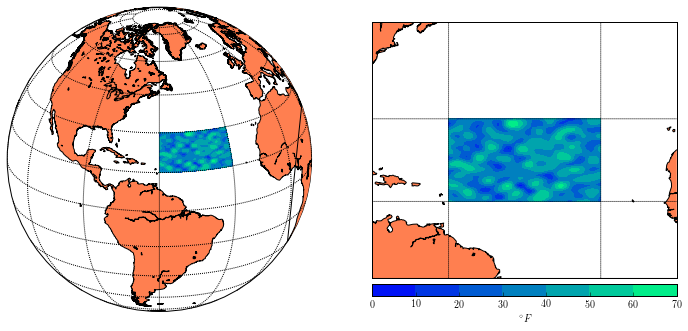

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(121, aspect='equal')
map1.drawmeridians(np.arange(0, 360, 30))
map1.drawparallels(np.arange(-90, 90, 15))
map1.drawcoastlines()
map1.fillcontinents(color='coral')
map1.contourf(lo1, la1, temperatures, cmap=cm.winter)

plt.subplot(122)
map2.drawmeridians(np.arange(0, 360, 30))
map2.drawparallels(np.arange(-90, 90, 15))
map2.drawcoastlines()
map2.fillcontinents(color='coral')
C = map2.contourf(lo2, la2, temperatures, cmap=cm.winter)
Cb = map2.colorbar(C, "bottom", size="5%", pad="2%")
Cb.set_label(r'$\mbox{}^{\circ} F$')

plt.show()